# Important Headers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import random
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.layers import BatchNormalization, SeparableConv2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img

# Reading From Train File And Preproccessing That

Found 5216 images belonging to 2 classes.


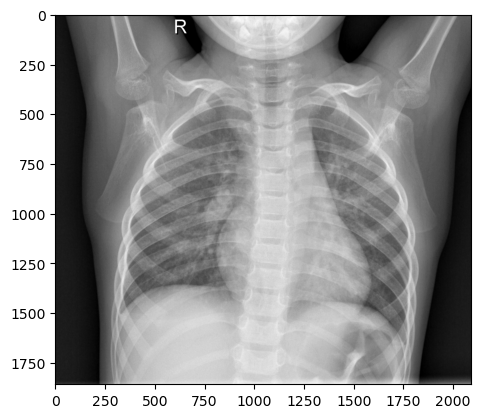

(1858, 2090)


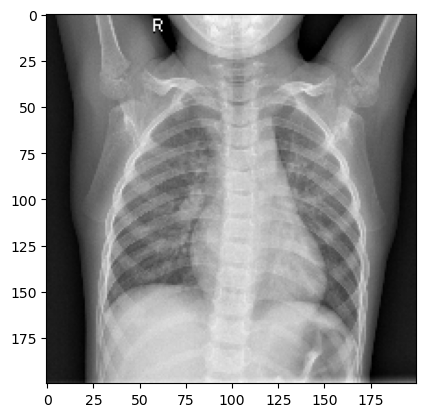

<class 'numpy.ndarray'>


In [2]:
DATA_TRAIN = "train"
CATEGORIES_TRAIN = ["NORMAL", "PNEUMONIA"]

IMG_SIZE = 200

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

training_data = train_datagen.flow_from_directory(
    DATA_TRAIN,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary',
    classes=CATEGORIES_TRAIN)

for category in CATEGORIES_TRAIN:
    path = os.path.join(DATA_TRAIN, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

print(img_array.shape)

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

training_data = []

def create_training_data():
    for category in CATEGORIES_TRAIN:
        path = os.path.join(DATA_TRAIN, category)
        class_num = CATEGORIES_TRAIN.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)

x_train = []
y_train = []

for features, label in training_data:
    x_train.append(features)
    y_train.append(label)

x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)
print(type(y_train))

# Reading From Test File And Preproccessing That

Found 624 images belonging to 2 classes.


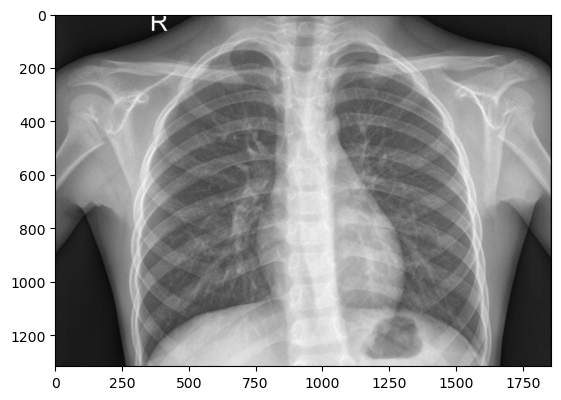

(1317, 1857)


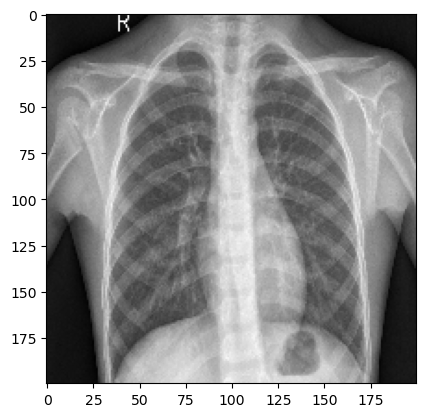

<class 'numpy.ndarray'>


In [3]:
DATADIR_TEST = "test"
CATEGORIES_TEST = ["NORMAL", "PNEUMONIA"]
IMG_SIZE = 200

test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

testing_data = test_datagen.flow_from_directory(
    DATADIR_TEST,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary',
    classes=CATEGORIES_TEST)


for category in CATEGORIES_TEST:
    path = os.path.join(DATADIR_TEST, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

print(img_array.shape)

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

testing_data = []

def create_testing_data():
    for category in CATEGORIES_TEST:
        path = os.path.join(DATADIR_TEST, category)
        class_num = CATEGORIES_TEST.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass

create_testing_data()

import random

random.shuffle(testing_data)

x_test = []
y_test = []

for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)

x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)
print(type(y_test))


# Reading From Validation File And Preproccessing That

Found 624 images belonging to 2 classes.


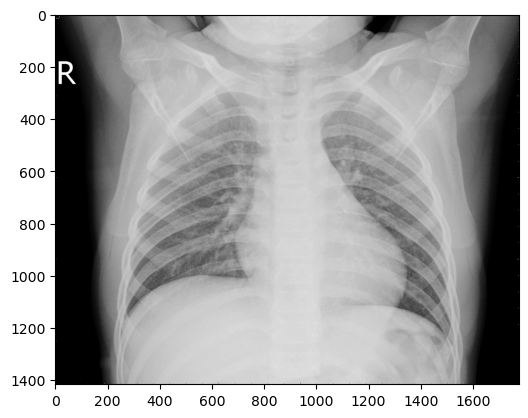

(1416, 1776)


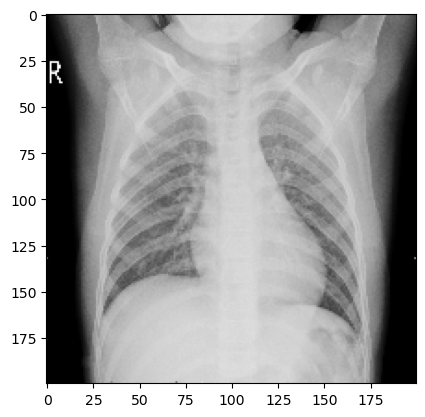

<class 'numpy.ndarray'>


In [4]:
DATADIR_VAL = "val"
CATEGORIES_VAL = ["NORMAL", "PNEUMONIA"]
IMG_SIZE = 200


val_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

validation_data = val_datagen.flow_from_directory(
    DATADIR_TEST,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary',
    classes=CATEGORIES_VAL)



for category in CATEGORIES_VAL:
    path = os.path.join(DATADIR_VAL, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

print(img_array.shape)

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

validation_data = []

def create_validation_data():
    for category in CATEGORIES_VAL:
        path = os.path.join(DATADIR_VAL, category)
        class_num = CATEGORIES_VAL.index(category)
        #print(class_num, " + ",category)
        #print(type(class_num), " + ",type(category))
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                #print(new_array, class_num)
                validation_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_validation_data()      


import random

random.shuffle(validation_data)



x_val = []
y_val = []

for features, label in validation_data:
    x_val.append(features)
    y_val.append(label)

x_val = np.array(x_val).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)
print(type(y_val))

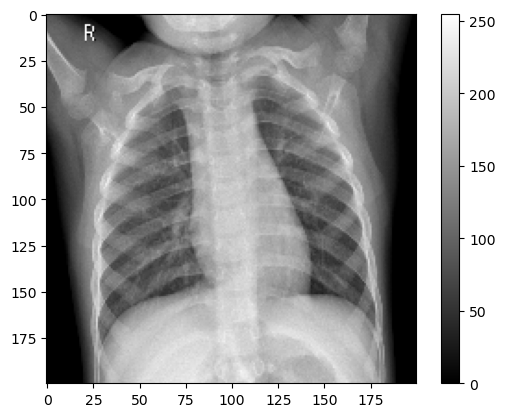

In [5]:
plt.figure()
plt.imshow(x_train[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

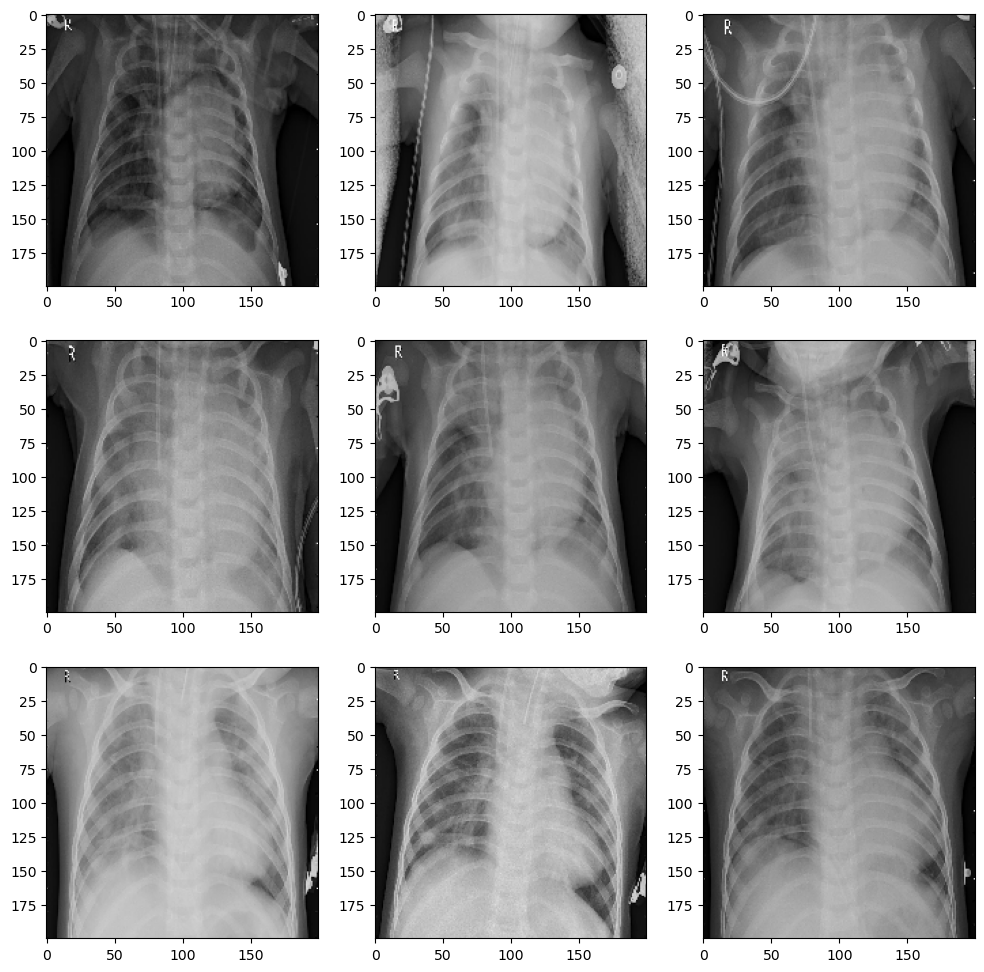

In [6]:
codition = 'PNEUMONIA'

plt.figure(figsize = (12, 12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(DATADIR_TEST + '/' + codition + '/' + os.listdir(DATADIR_TEST + '/' + codition)[i], target_size = (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
plt.show()

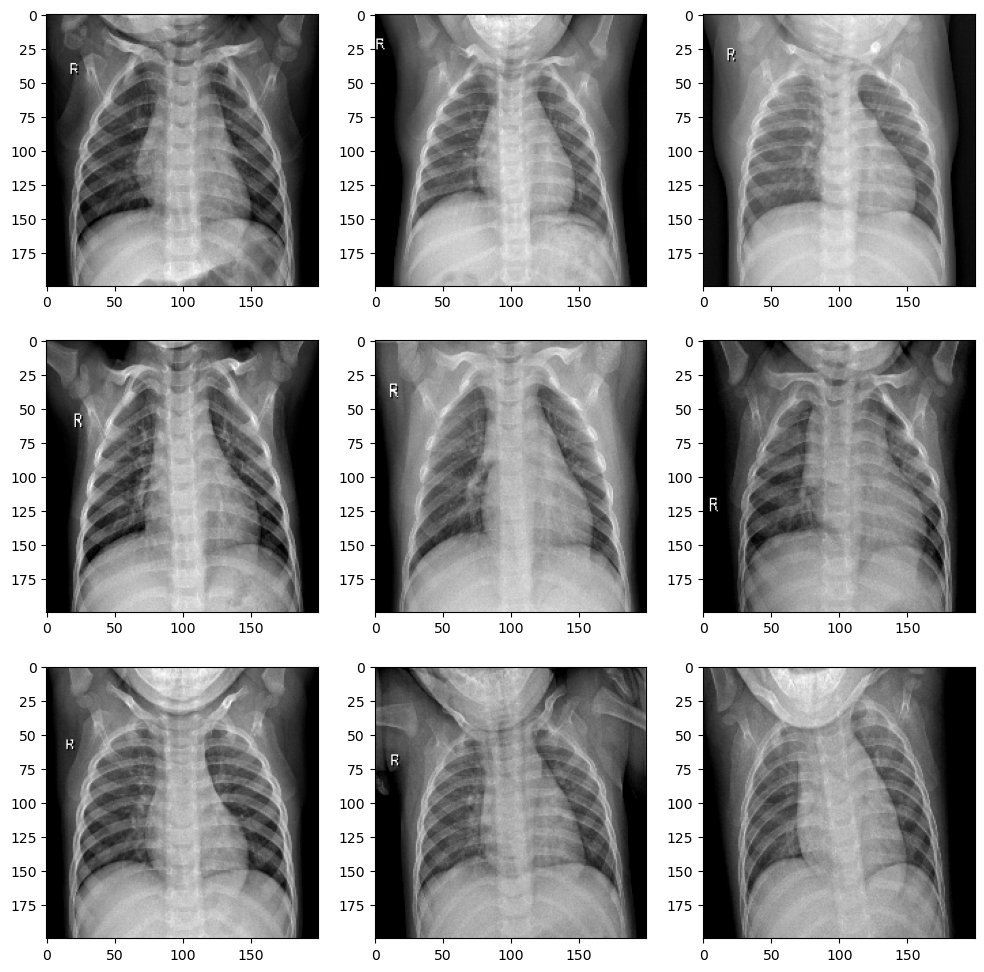

In [7]:
codition = 'NORMAL'

plt.figure(figsize = (12, 12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(DATA_TRAIN + '/' + codition + '/' + os.listdir(DATA_TRAIN + '/' + codition)[i], target_size = (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
plt.show()

# Review Number Of Images And Size In 3 Files

In [8]:

print(x_train.shape)
print(y_train.shape)
print("/=====================/")
print(x_test.shape)
print(y_test.shape)
print("/=====================/")
print(x_val.shape)
print(y_val.shape)


(5216, 200, 200, 1)
(5216,)
/=====================/
(624, 200, 200, 1)
(624,)
/=====================/
(16, 200, 200, 1)
(16,)


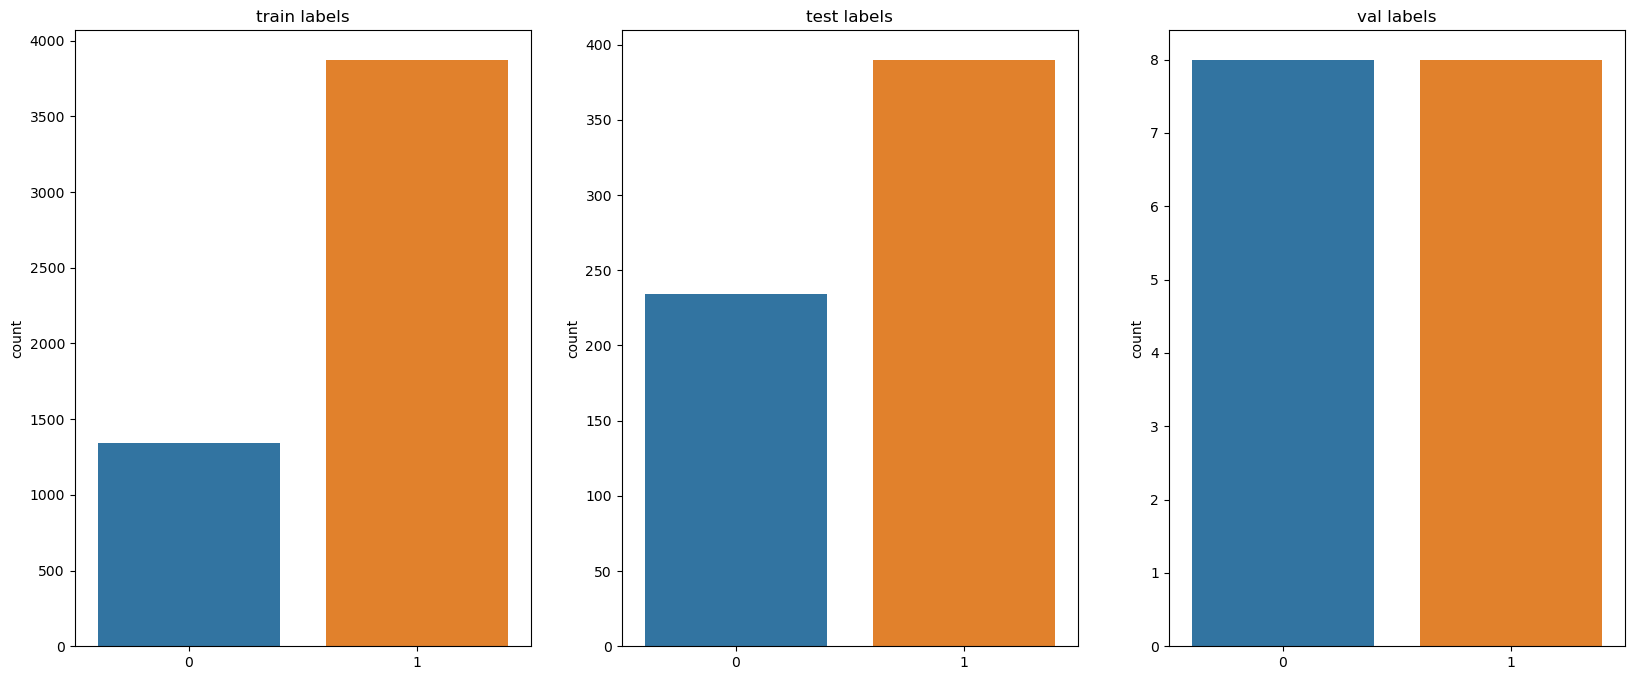

In [9]:
import seaborn as sns
plt.figure(10 , figsize = (20 ,8))
n = 0 
for z , j in zip([y_train , y_test, y_val] , ['train labels','test labels', 'val labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

# Model [ EfficientNet B7 ]

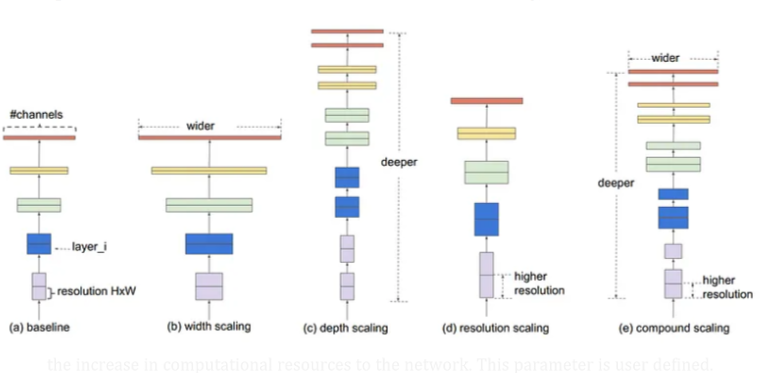


In [10]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import Lambda

# Load pre-trained model (excluding top layers)
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Add a lambda layer to convert gray images to RGB images
gray_to_rgb = Lambda(lambda x: tf.repeat(x, 3, axis=-1))
x = gray_to_rgb(base_model.output)

# Add a global average pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add a decoder layer
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Add a softmax layer for classification
output_layer = tf.keras.layers.Dense(2, activation='softmax')(x)

# Define the model
model = tf.keras.models.Model(inputs=base_model.input, outputs=output_layer)

# Set trainable layers
for layer in model.layers[:-4]:
    layer.trainable = False

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 200, 200, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 200, 200, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 200, 200, 3)  0           ['normalization[0][0]']      

 block1c_dwconv (DepthwiseConv2  (None, 100, 100, 32  288        ['block1b_add[0][0]']            
 D)                             )                                                                 
                                                                                                  
 block1c_bn (BatchNormalization  (None, 100, 100, 32  128        ['block1c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block1c_activation (Activation  (None, 100, 100, 32  0          ['block1c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block1c_se_squeeze (GlobalAver  (None, 32)          0           ['block1c_activation[0][0]']     
 agePoolin

                                                                                                  
 block2a_activation (Activation  (None, 50, 50, 192)  0          ['block2a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block2a_se_squeeze (GlobalAver  (None, 192)         0           ['block2a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2a_se_reshape (Reshape)   (None, 1, 1, 192)    0           ['block2a_se_squeeze[0][0]']     
                                                                                                  
 block2a_se_reduce (Conv2D)     (None, 1, 1, 8)      1544        ['block2a_se_reshape[0][0]']     
          

                                                                                                  
 block2c_se_expand (Conv2D)     (None, 1, 1, 288)    3744        ['block2c_se_reduce[0][0]']      
                                                                                                  
 block2c_se_excite (Multiply)   (None, 50, 50, 288)  0           ['block2c_activation[0][0]',     
                                                                  'block2c_se_expand[0][0]']      
                                                                                                  
 block2c_project_conv (Conv2D)  (None, 50, 50, 48)   13824       ['block2c_se_excite[0][0]']      
                                                                                                  
 block2c_project_bn (BatchNorma  (None, 50, 50, 48)  192         ['block2c_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block2e_project_conv (Conv2D)  (None, 50, 50, 48)   13824       ['block2e_se_excite[0][0]']      
                                                                                                  
 block2e_project_bn (BatchNorma  (None, 50, 50, 48)  192         ['block2e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2e_drop (Dropout)         (None, 50, 50, 48)   0           ['block2e_project_bn[0][0]']     
                                                                                                  
 block2e_add (Add)              (None, 50, 50, 48)   0           ['block2e_drop[0][0]',           
                                                                  'block2d_add[0][0]']            
          

                                                                                                  
 block2g_drop (Dropout)         (None, 50, 50, 48)   0           ['block2g_project_bn[0][0]']     
                                                                                                  
 block2g_add (Add)              (None, 50, 50, 48)   0           ['block2g_drop[0][0]',           
                                                                  'block2f_add[0][0]']            
                                                                                                  
 block3a_expand_conv (Conv2D)   (None, 50, 50, 288)  13824       ['block2g_add[0][0]']            
                                                                                                  
 block3a_expand_bn (BatchNormal  (None, 50, 50, 288)  1152       ['block3a_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block3c_expand_bn (BatchNormal  (None, 25, 25, 480)  1920       ['block3c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3c_expand_activation (Act  (None, 25, 25, 480)  0          ['block3c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3c_dwconv (DepthwiseConv2  (None, 25, 25, 480)  12000      ['block3c_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3c_b

 ivation)                                                                                         
                                                                                                  
 block3e_dwconv (DepthwiseConv2  (None, 25, 25, 480)  12000      ['block3e_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3e_bn (BatchNormalization  (None, 25, 25, 480)  1920       ['block3e_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3e_activation (Activation  (None, 25, 25, 480)  0          ['block3e_bn[0][0]']             
 )                                                                                                
          

 block3g_bn (BatchNormalization  (None, 25, 25, 480)  1920       ['block3g_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3g_activation (Activation  (None, 25, 25, 480)  0          ['block3g_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3g_se_squeeze (GlobalAver  (None, 480)         0           ['block3g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3g_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3g_se_squeeze[0][0]']     
          

 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block4b_se_reduce[0][0]']      
                                                                                                  
 block4b_se_excite (Multiply)   (None, 13, 13, 960)  0           ['block4b_activation[0][0]',     
                                                                  'block4b_se_expand[0][0]']      
          

                                                                                                  
 block4d_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block4d_se_reduce[0][0]']      
                                                                                                  
 block4d_se_excite (Multiply)   (None, 13, 13, 960)  0           ['block4d_activation[0][0]',     
                                                                  'block4d_se_expand[0][0]']      
                                                                                                  
 block4d_project_conv (Conv2D)  (None, 13, 13, 160)  153600      ['block4d_se_excite[0][0]']      
                                                                                                  
 block4d_project_bn (BatchNorma  (None, 13, 13, 160)  640        ['block4d_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block4f_project_conv (Conv2D)  (None, 13, 13, 160)  153600      ['block4f_se_excite[0][0]']      
                                                                                                  
 block4f_project_bn (BatchNorma  (None, 13, 13, 160)  640        ['block4f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4f_drop (Dropout)         (None, 13, 13, 160)  0           ['block4f_project_bn[0][0]']     
                                                                                                  
 block4f_add (Add)              (None, 13, 13, 160)  0           ['block4f_drop[0][0]',           
                                                                  'block4e_add[0][0]']            
          

                                                                                                  
 block4h_drop (Dropout)         (None, 13, 13, 160)  0           ['block4h_project_bn[0][0]']     
                                                                                                  
 block4h_add (Add)              (None, 13, 13, 160)  0           ['block4h_drop[0][0]',           
                                                                  'block4g_add[0][0]']            
                                                                                                  
 block4i_expand_conv (Conv2D)   (None, 13, 13, 960)  153600      ['block4h_add[0][0]']            
                                                                                                  
 block4i_expand_bn (BatchNormal  (None, 13, 13, 960)  3840       ['block4i_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block5a_expand_conv (Conv2D)   (None, 13, 13, 960)  153600      ['block4j_add[0][0]']            
                                                                                                  
 block5a_expand_bn (BatchNormal  (None, 13, 13, 960)  3840       ['block5a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5a_expand_activation (Act  (None, 13, 13, 960)  0          ['block5a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5a_dwconv (DepthwiseConv2  (None, 13, 13, 960)  24000      ['block5a_expand_activation[0][0]
 D)       

                                                                                                  
 block5c_dwconv (DepthwiseConv2  (None, 13, 13, 1344  33600      ['block5c_expand_activation[0][0]
 D)                             )                                ']                               
                                                                                                  
 block5c_bn (BatchNormalization  (None, 13, 13, 1344  5376       ['block5c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block5c_activation (Activation  (None, 13, 13, 1344  0          ['block5c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5c_s

                                                                                                  
 block5e_bn (BatchNormalization  (None, 13, 13, 1344  5376       ['block5e_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block5e_activation (Activation  (None, 13, 13, 1344  0          ['block5e_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5e_se_squeeze (GlobalAver  (None, 1344)        0           ['block5e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5e_s

                                                                                                  
 block5g_activation (Activation  (None, 13, 13, 1344  0          ['block5g_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5g_se_squeeze (GlobalAver  (None, 1344)        0           ['block5g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5g_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5g_se_squeeze[0][0]']     
                                                                                                  
 block5g_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5g_se_reshape[0][0]']     
          

                                                                                                  
 block5i_se_squeeze (GlobalAver  (None, 1344)        0           ['block5i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5i_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5i_se_squeeze[0][0]']     
                                                                                                  
 block5i_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5i_se_reshape[0][0]']     
                                                                                                  
 block5i_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5i_se_reduce[0][0]']      
                                                                                                  
 block5i_s

                                                                                                  
 block6a_se_squeeze (GlobalAver  (None, 1344)        0           ['block6a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6a_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block6a_se_squeeze[0][0]']     
                                                                                                  
 block6a_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block6a_se_reshape[0][0]']     
                                                                                                  
 block6a_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block6a_se_reduce[0][0]']      
                                                                                                  
 block6a_s

 block6c_se_excite (Multiply)   (None, 7, 7, 2304)   0           ['block6c_activation[0][0]',     
                                                                  'block6c_se_expand[0][0]']      
                                                                                                  
 block6c_project_conv (Conv2D)  (None, 7, 7, 384)    884736      ['block6c_se_excite[0][0]']      
                                                                                                  
 block6c_project_bn (BatchNorma  (None, 7, 7, 384)   1536        ['block6c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6c_drop (Dropout)         (None, 7, 7, 384)    0           ['block6c_project_bn[0][0]']     
                                                                                                  
 block6c_a

 block6e_project_bn (BatchNorma  (None, 7, 7, 384)   1536        ['block6e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6e_drop (Dropout)         (None, 7, 7, 384)    0           ['block6e_project_bn[0][0]']     
                                                                                                  
 block6e_add (Add)              (None, 7, 7, 384)    0           ['block6e_drop[0][0]',           
                                                                  'block6d_add[0][0]']            
                                                                                                  
 block6f_expand_conv (Conv2D)   (None, 7, 7, 2304)   884736      ['block6e_add[0][0]']            
                                                                                                  
 block6f_e

 block6g_add (Add)              (None, 7, 7, 384)    0           ['block6g_drop[0][0]',           
                                                                  'block6f_add[0][0]']            
                                                                                                  
 block6h_expand_conv (Conv2D)   (None, 7, 7, 2304)   884736      ['block6g_add[0][0]']            
                                                                                                  
 block6h_expand_bn (BatchNormal  (None, 7, 7, 2304)  9216        ['block6h_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6h_expand_activation (Act  (None, 7, 7, 2304)  0           ['block6h_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block6j_expand_bn (BatchNormal  (None, 7, 7, 2304)  9216        ['block6j_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6j_expand_activation (Act  (None, 7, 7, 2304)  0           ['block6j_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6j_dwconv (DepthwiseConv2  (None, 7, 7, 2304)  57600       ['block6j_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6j_bn (BatchNormalization  (None, 7, 7, 2304)  9216        ['block6j_dwconv[0][0]']         
 )        

                                                                                                  
 block6l_dwconv (DepthwiseConv2  (None, 7, 7, 2304)  57600       ['block6l_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6l_bn (BatchNormalization  (None, 7, 7, 2304)  9216        ['block6l_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6l_activation (Activation  (None, 7, 7, 2304)  0           ['block6l_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6l_s

 )                                                                                                
                                                                                                  
 block7a_activation (Activation  (None, 7, 7, 2304)  0           ['block7a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block7a_se_squeeze (GlobalAver  (None, 2304)        0           ['block7a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7a_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block7a_se_squeeze[0][0]']     
                                                                                                  
 block7a_s

 block7c_se_reduce (Conv2D)     (None, 1, 1, 160)    614560      ['block7c_se_reshape[0][0]']     
                                                                                                  
 block7c_se_expand (Conv2D)     (None, 1, 1, 3840)   618240      ['block7c_se_reduce[0][0]']      
                                                                                                  
 block7c_se_excite (Multiply)   (None, 7, 7, 3840)   0           ['block7c_activation[0][0]',     
                                                                  'block7c_se_expand[0][0]']      
                                                                                                  
 block7c_project_conv (Conv2D)  (None, 7, 7, 640)    2457600     ['block7c_se_excite[0][0]']      
                                                                                                  
 block7c_project_bn (BatchNorma  (None, 7, 7, 640)   2560        ['block7c_project_conv[0][0]']   
 lization)

In [13]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
163/163 [==============================] - 1954s 12s/step - loss: 0.7423 - accuracy: 0.9145 - val_loss: 0.0756 - val_accuracy: 1.0000
Epoch 2/10
163/163 [==============================] - 1996s 12s/step - loss: 0.1631 - accuracy: 0.9381 - val_loss: 0.1938 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 1986s 12s/step - loss: 0.1517 - accuracy: 0.9440 - val_loss: 0.0702 - val_accuracy: 1.0000
Epoch 4/10
163/163 [==============================] - 2004s 12s/step - loss: 0.1740 - accuracy: 0.9371 - val_loss: 0.1827 - val_accuracy: 0.9375
Epoch 5/10
163/163 [==============================] - 2021s 12s/step - loss: 0.2042 - accuracy: 0.9247 - val_loss: 0.2096 - val_accuracy: 0.9375
Epoch 6/10
163/163 [==============================] - 2003s 12s/step - loss: 0.1784 - accuracy: 0.9342 - val_loss: 0.2507 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 2013s 12s/step - loss: 0.2067 - accuracy: 0.9202 - val_loss: 0.2621 - val_ac

# Statement On The Model

In [14]:
results = model.evaluate(x_test,y_test)
val = model.evaluate(x_val,y_val)
print('The current model achieved a categorical accuracy of {}%!'.format(round(results[1]*100,2)))

1/1 [==============================] - 6s 6s/step - loss: 0.2968 - accuracy: 0.8750
The current model achieved a categorical accuracy of 82.05%!


# Graphics
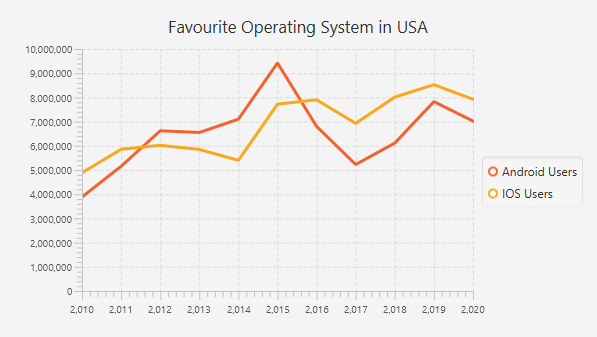

# 1 - Training Loss & Validation Loss

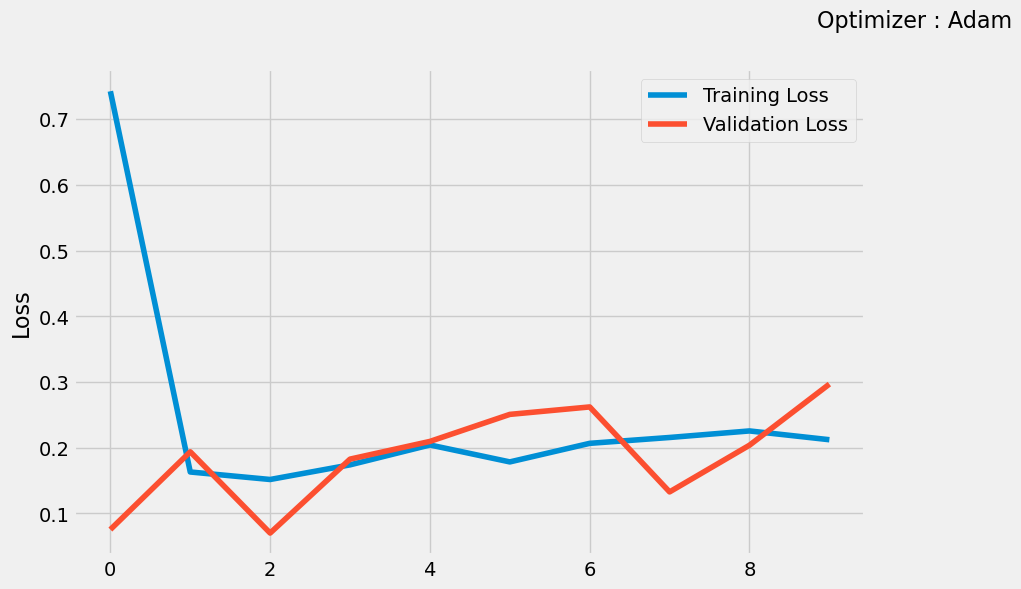

In [15]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

# 2 - Taining Accuracy & Validation Accuracy 

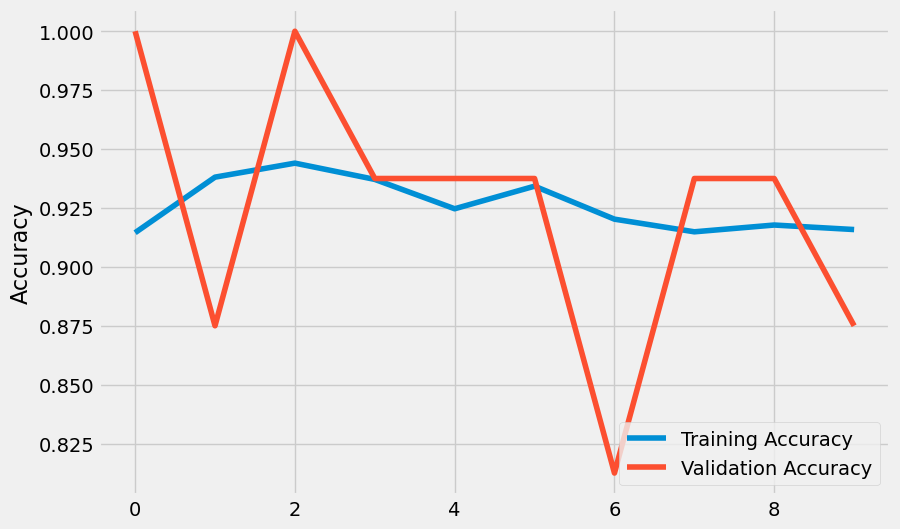

In [16]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# 3 - Train Accuracies

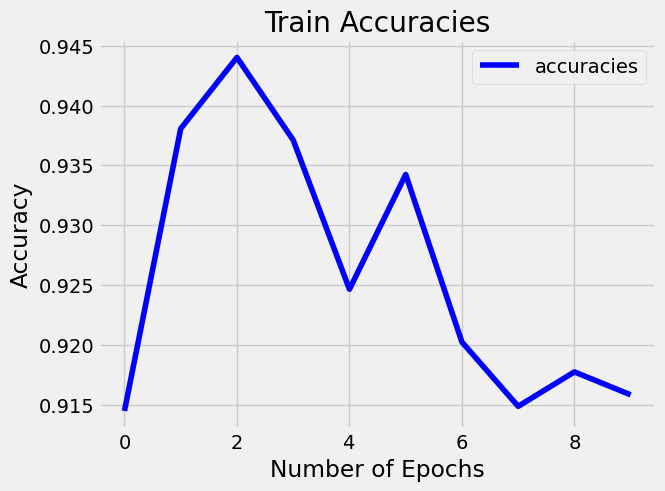

In [17]:
plt.style.use('fivethirtyeight')

plt.plot(history.history['accuracy'], color='b', label="accuracies")
plt.title("Train Accuracies")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 4 - Train Loss

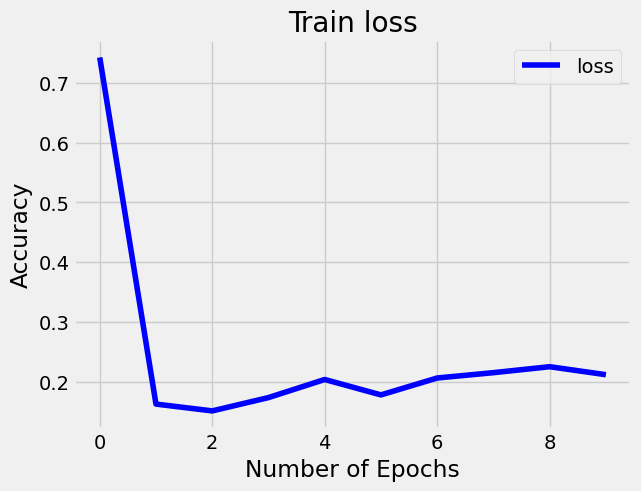

In [18]:
plt.style.use('fivethirtyeight')


plt.plot(history.history['loss'], color='b', label="loss")
plt.title("Train loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 5 - Training Loss & Accuracy

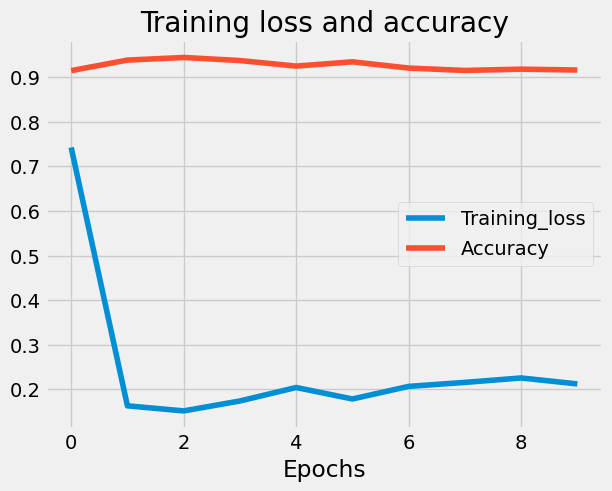

In [20]:
N=10 #epoch
plt.style.use('fivethirtyeight')

plt.plot(np.arange(0,N),history.history['loss'],label='Training_loss')
plt.plot(np.arange(0,N),history.history['accuracy'],label='Accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.legend(loc='right')

# Prelude to Prediction

In [21]:
predictions = model.predict(x_test)

20/20 [==============================] - 232s 11s/step


In [37]:
y_pred = [np.argmax(probas) for probas in predictions]

# Confusion Matrix
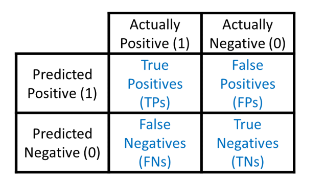

In [22]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<Figure size 640x480 with 0 Axes>

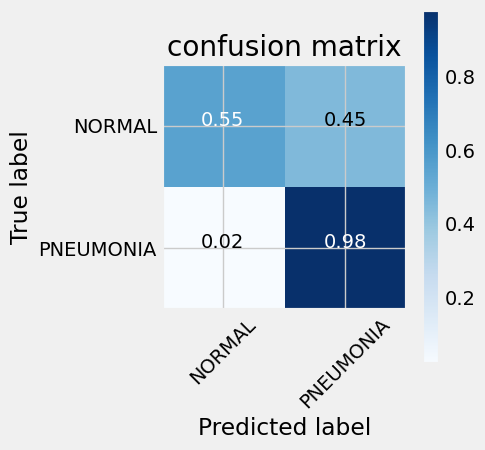

In [23]:
cnf_matrix = confusion_matrix(y_test, y_pred)

np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=CATEGORIES_TRAIN, title='confusion matrix')
plt.show()

# Operations On Confusion Matrix

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
print("accuracy     =:    " ,format(round(acc[-1]*100,2)))
print("val_accuracy =:    " ,format(round(val_acc[-1]*100,2)))
print("loss         =:    " ,format(round(loss[-1]*100,2)))
print("val_loss     =:    " ,format(round(val_loss[-1]*100,2)))

accuracy     =:     91.58
val_accuracy =:     87.5
loss         =:     21.22
val_loss     =:     29.68


# Prediction
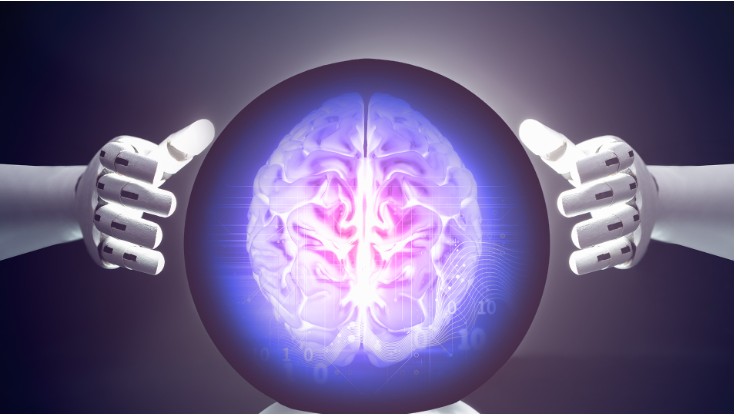

1/1 [==============================] - 0s 449ms/step
1
This image is :  PNEUMONIA


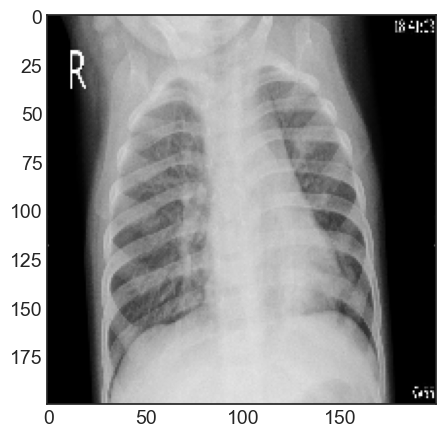

In [27]:
# Predict random image
plt.style.use('seaborn-white')

k = random.randint(0, (len(x_test)))
pred1 = model.predict(x_test[k].reshape(1, 200, 200, 1))
print(pred1.argmax())
print("This image is : ", CATEGORIES_TEST[pred1.argmax()])

pic2 = x_test[k].reshape(200, 200)
vmin = np.amin(pic2)
vmax = np.amax(pic2)
plt.imshow(pic2, cmap='gray', vmin=vmin, vmax=vmax)


In [ ]:
model.save("new4.model")